In [5]:
# import lib
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

np.random.seed(6789)

(100, 2)


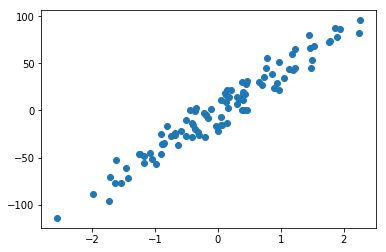

In [33]:
# create data
n_samples  = 100
n_outliers = 5
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=10, random_state=0)
X         = np.append(x,y[:,None],1)  

print(X.shape)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [216]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())

for iter in range(1000):
    loss = (X - X @ w @ w.T)
    grad = 2 * (X.T @ loss @ w) + 2*(w.T@X.T@loss).T
    
    if iter%100 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.00000000008 * grad
    w = w / np.sqrt((w**2).sum())




Current loss: 356.58750505761367  Weight : [0.62018452 0.78445597]
Current loss: 358.0150992439614  Weight : [0.62136939 0.78351776]
Current loss: 359.4451226973378  Weight : [0.62255384 0.78257697]
Current loss: 360.8775533320269  Weight : [0.62373787 0.78163359]
Current loss: 362.3123688927293  Weight : [0.62492145 0.78068764]
Current loss: 363.749546955689  Weight : [0.62610457 0.77973911]
Current loss: 365.1890649298455  Weight : [0.6272872  0.77878801]
Current loss: 366.6309000580146  Weight : [0.62846935 0.77783435]
Current loss: 368.0750294180878  Weight : [0.62965098 0.77687814]
Current loss: 369.5214299242593  Weight : [0.63083208 0.77591938]


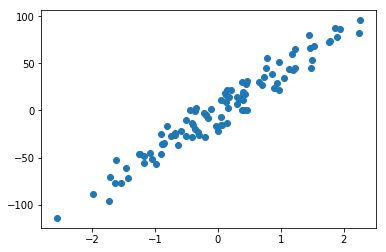

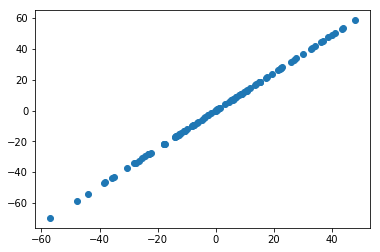

[[0.63201265]
 [0.77495807]]


In [217]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4.